**IA de Confiance**


*Répondre aux normes et aux exigences*

# Sommaire

1. Problématique
2. Méthodes interprétables
5. TP
6. Critiques


# Problématique

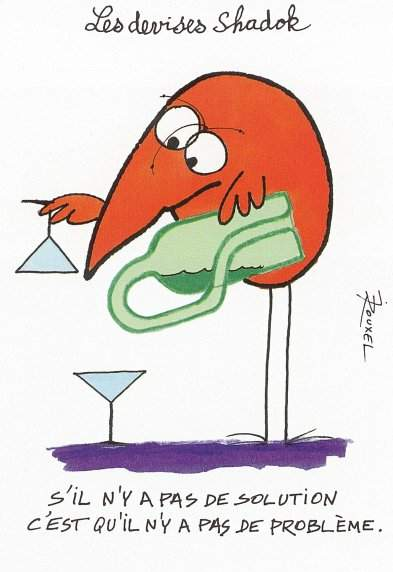

## Pourquoi fait on ce cours ?

Aujourd'hui on fait face à ...

###...

- Biais des algorithmes.


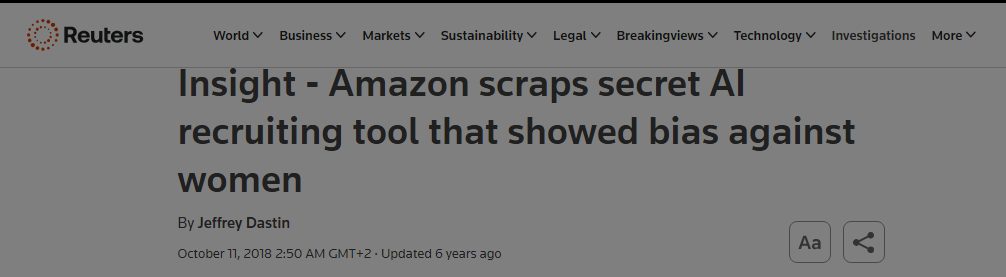

https://www.reuters.com/article/us-amazon-com-jobs-automation-insight/amazon-scraps-secret-ai-recruiting-tool-that-showed-bias-against-women-idUSKCN1MK08G/#_blank

https://www.telecom-paris.fr/wp-content-EvDsK19/uploads/2019/02/Algorithmes-Biais-discrimination-equite.pdf

### ...

- Manque de transparence et d'explicabilité des modèles.

Quelle serait votre réaction si un médecin vous remettait le résultat d’un algorithme de diagnostic médical, vous apprenant que vous êtes atteint d’une maladie grave, sans pouvoir vous donner davantage d’explication ?



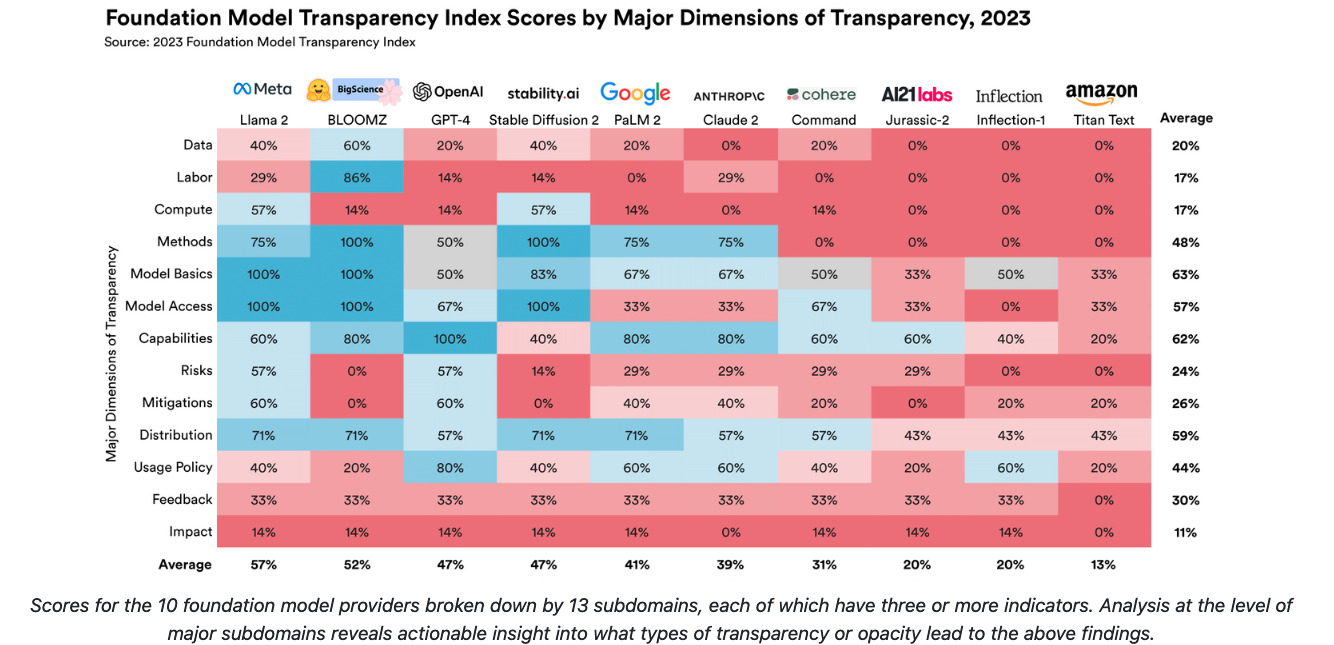

https://next.ink/747/stanford-pointe-manque-transparence-dans-grands-modeles-dintelligence-artificielle/

### ...

- Sécurité et vulnérabilité des systèmes IA.

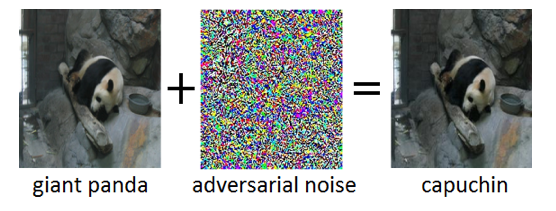

### ...

- Respect de la vie privée et protection des données personnelles.

### ...

- Légitimité et conformité réglementaire (RGPD, AI Act, …).


https://cyber.gouv.fr/sites/default/files/document/Recommandations_de_s%C3%A9curit%C3%A9_pour_un_syst%C3%A8me_d_IA_g%C3%A9n%C3%A9rative.pdf

# 1. Méthodes interprétables

## 1.1 Régression Linéaire

La régression linéaire est un modèle qui prédit une cible comme une somme pondérée des caractéristiques d'entrée. La linéarité de la relation apprise facilite l'interprétation. Les modèles de régression linéaire sont utilisés depuis longtemps par les statisticiens et les scientifiques pour résoudre des problèmes quantitatifs.


#### Formule de la Régression Linéaire

**Modèle de Régression Linéaire**



#### **Estimation des Poids**


#### **Avantages de la Régression Linéaire**


#### **Intervalles de Confiance**



#### **Hypothèses du Modèle**


#### **Interprétation des Poids**


In [ ]:
# exemple de code

### 1.1.2 Interprétation d'une Caractéristique

- Numérique:
L'augmentation d'une caractéristique $x_k$ d'une unité augmente la prédiction pour $y$ de $\beta_k$ unités, lorsque toutes les autres valeurs des caractéristiques restent fixes.
- Catégorielle: le changement de la caractéristique $x_k$ de la catégorie de référence à une autre catégorie augmente la prédiction pour $y$ de $\beta_k$ lorsque toutes les autres caractéristiques restent fixes.


#### Interprétation catégorielle

In [ ]:
! pip install mplcursors
! pip install seaborn

In [ ]:
import yfinance as yf
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import mplcursors

In [ ]:
# Télécharger les données historiques d'une action, par exemple Apple (AAPL)
ticker = 'NVDA'
data = yf.download(ticker, start="2023-01-01", end="2023-12-31")

# Utiliser les prix d'ouverture pour prédire les prix de clôture
X = data[['Open']]
y = data['Close']

[*********************100%***********************]  1 of 1 completed


Intercept: [0.46687698]
Coefficient: [0.98868935]


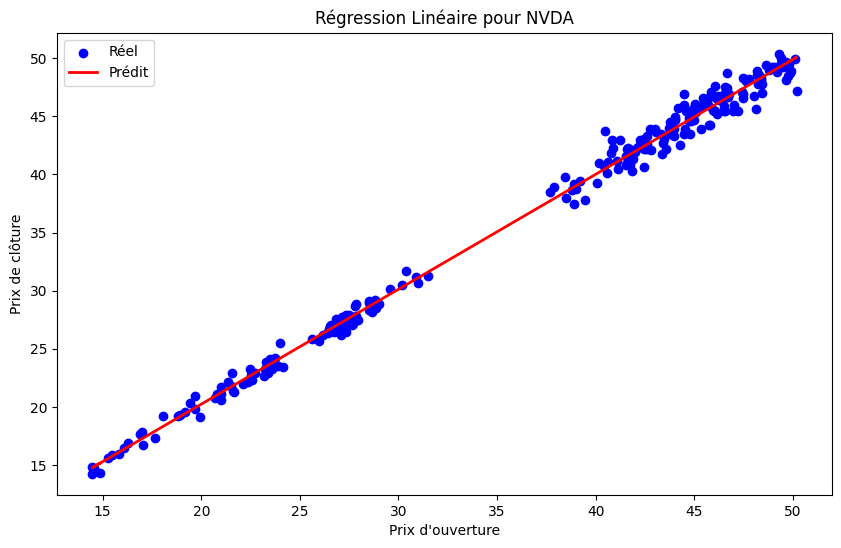

In [ ]:
# Créer le modèle de régression linéaire
model = LinearRegression()
model.fit(X, y)

# Afficher les coefficients
print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_[0])

# Prédire les prix de clôture
y_pred = model.predict(X)

# Visualiser les résultats
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Réel')
plt.plot(X, y_pred, color='red', linewidth=2, label='Prédit')
plt.title(f'Régression Linéaire pour {ticker}')
plt.xlabel('Prix d\'ouverture')
plt.ylabel('Prix de clôture')
plt.legend()
plt.show()


**Coefficient de Détermination $R^2$**

Le coefficient de détermination $R^2$ indique combien de la variance totale de votre cible est expliquée par le modèle. Plus $R^2$ est élevé, mieux le modèle explique les données. La formule pour calculer $R^2$ est :

$$
R^2 = 1 - \frac{SSE}{SST}
$$

- **SSE (Somme des Carrés des Erreurs)** : La somme des carrés des termes d'erreur.

$$
SSE = \sum_{i=1}^{n} (y^{(i)} - \hat{y}^{(i)})^2
$$

- **SST (Somme Totale des Carrés)** : La somme des carrés de la variance des données.

$$
SST = \sum_{i=1}^{n} (y^{(i)} - \bar{y})^2
$$

- **SSE** mesure combien de variance reste après l'ajustement du modèle linéaire.
- **SST** est la variance totale de la cible.
- $R^2$ indique combien de la variance peut être expliquée par le modèle linéaire. $R^2$ varie généralement entre 0 et 1. Une valeur négative peut survenir si le modèle ne capture pas la tendance des données.

#### **$R^2$ Ajusté**

Le $R^2$ ajusté tient compte du nombre de caractéristiques dans le modèle et est préférable pour éviter une inflation artificielle de $R^2$ due à l'ajout de caractéristiques non informatives. Sa formule est :

$$
\bar{R}^2 = 1 - (1 - R^2) \frac{n - 1}{n - p - 1}
$$

- $p$ est le nombre de caractéristiques.
- $n$ est le nombre d'instances.


In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(y, y_pred)

n = X.shape[0]
p = X.shape[1]

ajdusted_r2 =  1 - (1 - r2**2) * (n-1) /(n - p -1)
ajdusted_r2


0.9888102101208269

#### Autre Exemple


### Préparation des Données

Nous utilisons le jeu de données `bike-sharing-daily.csv` qui contient des informations sur les locations de vélos.

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     271.5
Date:                Tue, 04 Mar 2025   Prob (F-statistic):          8.22e-225
Time:                        13:39:14   Log-Likelihood:                -6029.0
No. Observations:                 731   AIC:                         1.208e+04
Df Residuals:                     721   BIC:                         1.212e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   2939

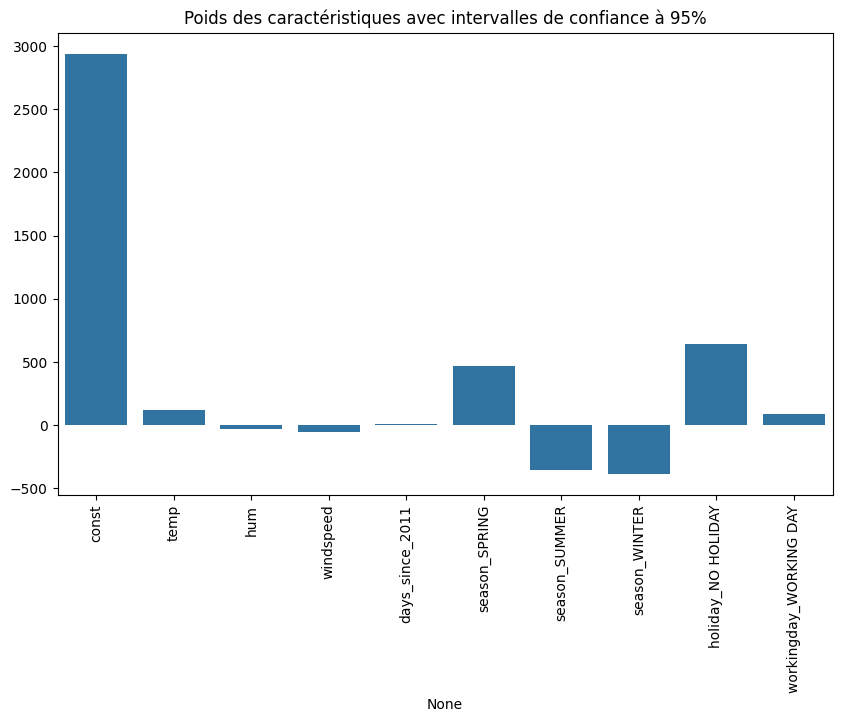

In [ ]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Charger les données
url = "https://raw.githubusercontent.com/christophM/interpretable-ml-book/master/data/bike.csv"
data = pd.read_csv(url)

# Préparer les caractéristiques et la cible
X = data[['season', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'days_since_2011']]
X = pd.get_dummies(X, drop_first=True, dtype=float)  # Encodage one-hot pour les variables catégorielles,  forcing dtype to float
y = data['cnt']

# Ajouter une constante pour l'intercept
X = sm.add_constant(X)

# Créer le modèle de régression linéaire
model = sm.OLS(y, X).fit()

# Afficher les résultats
print(model.summary())

# Calculer R^2 et R^2 ajusté
r2 = model.rsquared
adjusted_r2 = model.rsquared_adj
print(f"R^2: {r2}")
print(f"R^2 ajusté: {adjusted_r2}")

# Calculer l'importance des caractéristiques
importance = np.abs(model.tvalues)
print("Importance des caractéristiques:\n", importance)

# Visualisation des poids avec intervalles de confiance
plt.figure(figsize=(10, 6))
sns.barplot(x=model.params.index, y=model.params.values)
plt.xticks(rotation=90)
plt.title('Poids des caractéristiques avec intervalles de confiance à 95%')
plt.show()

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     251.2
Date:                Mon, 03 Mar 2025   Prob (F-statistic):          1.05e-237
Time:                        19:32:09   Log-Likelihood:                -5993.0
No. Observations:                 731   AIC:                         1.201e+04
Df Residuals:                     719   BIC:                         1.207e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

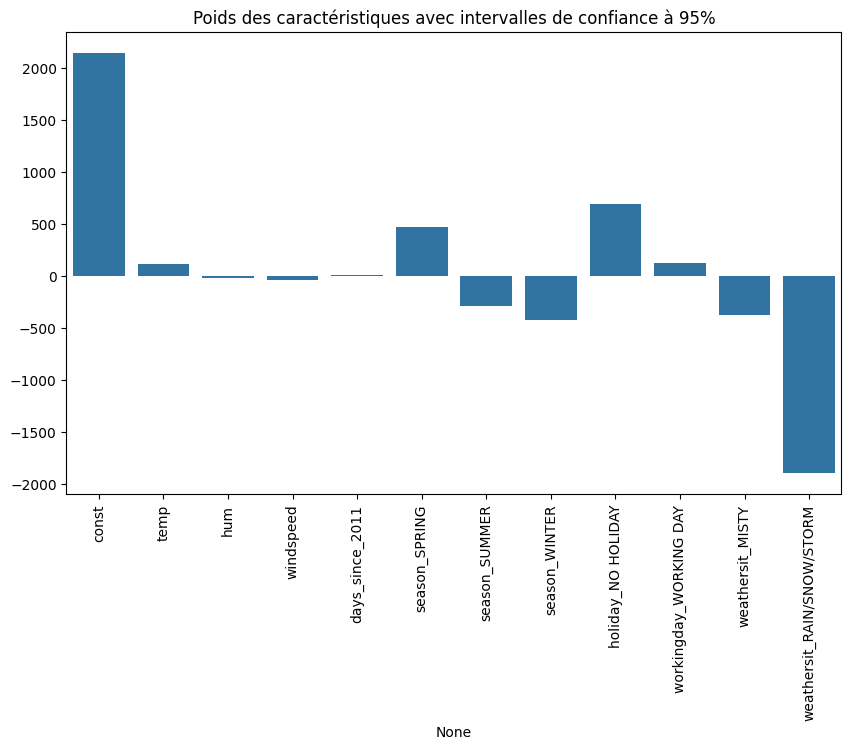

#### Encodage des Caractéristiques Catégorielles

Il existe plusieurs façons d'encoder une caractéristique catégorielle, et le choix influence l'interprétation des poids.


### 1.1.5 Encodage Standard : Treatment Coding


#### Effect Coding



#### Effect Coding

Le poids par catégorie est la différence estimée de $y$ entre la catégorie correspondante et la moyenne globale (lorsque toutes les autres caractéristiques sont nulles ou la catégorie de référence). L'intercept représente la moyenne globale.

**Matrice de Caractéristiques :**

$$
\begin{pmatrix}
1 & -1 & -1 \\
1 & -1 & -1 \\
1 & 1 & -1 \\
1 & 1 & -1 \\
1 & 0 & 1 \\
1 & 0 & 1 \\
\end{pmatrix}
$$

#### Dummy Coding

Le $\beta$ par catégorie est la valeur moyenne estimée de $y$ pour chaque catégorie (lorsque toutes les autres valeurs de caractéristiques sont nulles ou la catégorie de référence). L'intercept est omis pour obtenir une solution unique.

**Matrice de Caractéristiques :**

$$
\begin{pmatrix}
1 & 0 & 0 \\
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1 \\
0 & 0 & 1 \\
\end{pmatrix}
$$

#### Dummy Coding



#### Exemple de Code Python

Voici comment vous pouvez appliquer ces encodages et évaluer un modèle linéaire :

Le Lasso est une méthode automatique et pratique pour introduire la parcimonie dans le modèle de régression linéaire. Lasso signifie "least absolute shrinkage and selection operator" et, lorsqu'il est appliqué dans un modèle de régression linéaire, il effectue une sélection de caractéristiques et une régularisation des poids des caractéristiques sélectionnées.

Le problème de minimisation que les poids optimisent est :

$$
\min_{\beta} \left( \frac{1}{n} \sum_{i=1}^{n} (y^{(i)} - x_i^T \beta)^2 \right)
$$

Le Lasso ajoute un terme à ce problème d'optimisation :

$$
\min_{\beta} \left( \frac{1}{n} \sum_{i=1}^{n} (y^{(i)} - x_i^T \beta)^2 + \lambda ||\beta||_1 \right)
$$

Le terme $|| \beta ||_1$, la norme L1 du vecteur de caractéristiques, conduit à une pénalisation des grands poids. En utilisant la norme L1, de nombreux poids reçoivent une estimation de 0, et les autres sont réduits. Le paramètre \(\lambda\) contrôle la force de l'effet de régularisation et est généralement ajusté par validation croisée.

### Exemple avec Lasso

Nous allons prédire les locations de vélos en utilisant le Lasso. Nous définissons d'abord le nombre de caractéristiques que nous voulons dans le modèle. Commençons par 2 caractéristiques :



Meilleur lambda: 1.0
Nombre de caractéristiques non nulles: 11


ValueError: x and y must have same first dimension, but have shapes (12,) and (11,)

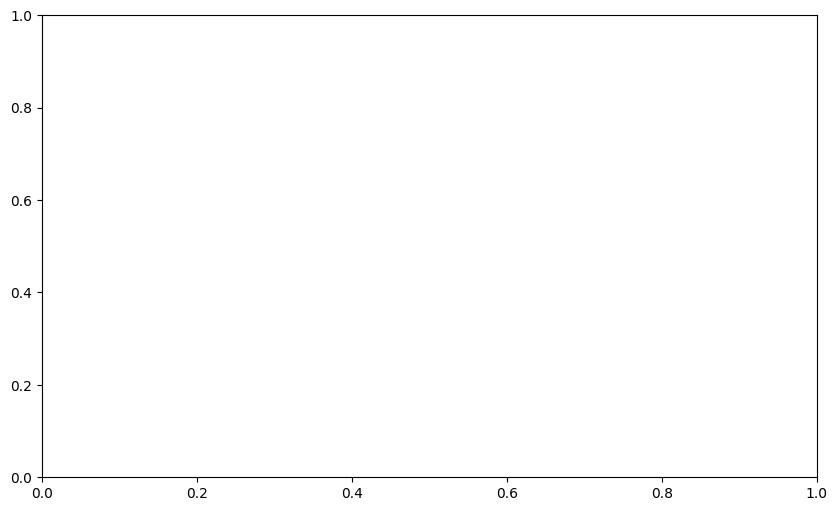

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
import pandas as pd


# Charger les données
url = "https://raw.githubusercontent.com/christophM/interpretable-ml-book/refs/heads/master/data/bike.csv"
data = pd.read_csv(url)

# Préparer les caractéristiques et la cible
X = data[['season', 'holiday', 'workingday', 'weathersit', 'temp', 'hum', 'windspeed', 'days_since_2011']]
X = pd.get_dummies(X, drop_first=True)  # Encodage one-hot pour les variables catégorielles
y = data['cnt']

# Normaliser les caractéristiques
X = (X - X.mean()) / X.std()

# Définir le modèle Lasso
lasso = Lasso()

# Définir les valeurs de lambda à tester
param_grid = {'alpha': np.logspace(0, 0, 12)}

# Utiliser GridSearchCV pour trouver le meilleur lambda
grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X, y)

# Meilleur lambda
best_lambda = grid_search.best_params_['alpha']
print(f"Meilleur lambda: {best_lambda}")

# Entraîner le modèle Lasso avec le meilleur lambda
lasso = Lasso(alpha=best_lambda)
lasso.fit(X, y)

# Afficher les poids non nuls
non_zero_weights = np.sum(lasso.coef_ != 0)
print(f"Nombre de caractéristiques non nulles: {non_zero_weights}")

# Visualiser les chemins de régularisation
coefs = []
for alpha in param_grid['alpha']:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X, y)
    coefs.append(lasso.coef_)

plt.figure(figsize=(10, 6))
for i, coef in enumerate(coefs):
    plt.plot(param_grid['alpha'], coef, label=X.columns[i])
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Coefficients')
plt.title('Chemins de Régularisation Lasso')
plt.legend()
plt.show()

In [ ]:
lasso.coef_

array([ 949.30002523, -246.27697843, -219.69591942, 1039.74367801,
        206.53063844, -121.8246379 , -183.3950544 ,  113.80548467,
         57.38120629, -178.96760616, -317.23082088])

## 1.2 Régression Logistique


La régression logistique est un modèle de classification binaire qui estime la probabilité qu'une observation appartienne à une classe donnée. Contrairement à la régression linéaire, elle est conçue pour éviter des valeurs incohérentes (inférieures à 0 ou supérieures à 1).

### Pourquoi la régression linéaire ne fonctionne pas ?

## 1.2 Régression Logistique

La régression logistique est un modèle de classification binaire qui estime la probabilité qu'une observation appartienne à une classe donnée. Contrairement à la régression linéaire, elle est conçue pour éviter des valeurs incohérentes (inférieures à 0 ou supérieures à 1).

### Pourquoi la régression linéaire ne fonctionne pas ?

- **Pas d'interprétation probabiliste** : La régression linéaire applique une interpolation linéaire qui n'est pas bornée entre 0 et 1.
- **Extrapolation non contrôlée** : Elle peut produire des valeurs négatives ou supérieures à 1, ce qui n'a pas de sens pour une probabilité.
- **Problèmes de classification multi-classes** : Une simple extension (label 0, 1, 2, ...) impose une structure artificielle aux classes.

### Théorie

La solution : **la régression logistique**. Elle applique la fonction sigmoïde pour transformer une combinaison linéaire des variables en une probabilité :

$$
P(y = 1) = \frac{1}{1 + e^{-(\beta_0 + \sum \beta_j x_j)}}
$$

La fonction sigmoïde :

$$
sigmoide(\eta) = \frac{1}{1 + e^{-\eta}}
$$

Elle assure une sortie comprise entre 0 et 1.

### 5.2.4 Exemple

Un modèle de régression logistique prédisant le cancer du col de l'utérus donne les résultats suivants :

| Variable | Coefficient \( \beta_j \) | Odds Ratio \( e^{\beta_j} \) |
|----------|------------------|----------------|
| Intercept | -2.91 | 0.05 |
| Contraceptif hormonal (Oui/Non) | -0.12 | 0.89 |
| Fumeuse (Oui/Non) | 0.26 | 1.30 |
| Nombre de grossesses | 0.04 | 1.04 |
| Nombre de MST diagnostiquées | 0.82 | 2.27 |
| Dispositif intra-utérin (Oui/Non) | 0.62 | 1.86 |

**Interprétations :**
- Une femme ayant eu **une MST de plus** voit ses odds multipliées par **2.27**.
- Une femme utilisant un **contraceptif hormonal** voit ses odds réduites d'un facteur **0.89**.

💡 **Rappel** : Corrélation ≠ Causalité. Une variable peut être associée à une autre sans en être la cause.

<ipython-input-22-9e8ebc2af2d5>:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({"Healthy": 0, "Cancer": 1})  # Encodage de la variable cible
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

Accuracy: 0.94
Confusion Matrix:
 [[161   0]
 [ 11   0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       161
           1       0.00      0.00      0.00        11

    accuracy                           0.94       172
   macro avg       0.47      0.50      0.48       172
weighted avg       0.88      0.94      0.91       172



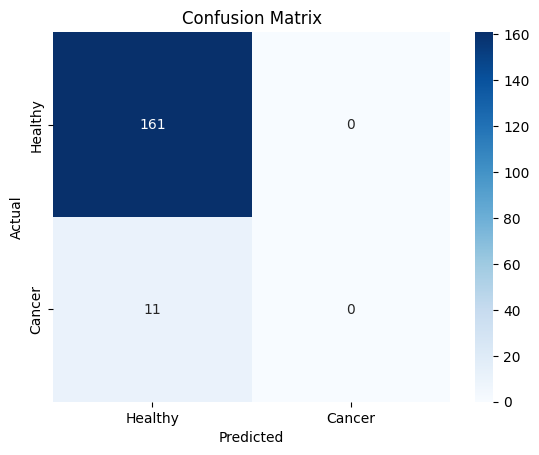

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Charger les données
url = "https://raw.githubusercontent.com/christophM/interpretable-ml-book/refs/heads/master/data/cervical.csv"
df = pd.read_csv(url)

# Prétraitement des données
df = df.dropna()  # Suppression des valeurs manquantes
df = df.replace({"Healthy": 0, "Cancer": 1})  # Encodage de la variable cible

# Sélection des features et de la cible
X = df[["Age", "Num.of.pregnancies", "Smokes", "Hormonal.Contraceptives", "STDs..Number.of.diagnosis"]]
y = df["Biopsy"]

# Séparation en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardisation des données
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Entraînement du modèle
model = LogisticRegression()
model.fit(X_train, y_train)

# Prédiction
y_pred = model.predict(X_test)

# Évaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", report)

# Visualisation de la matrice de confusion
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Healthy", "Cancer"], yticklabels=["Healthy", "Cancer"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
df.head()

Age  Number.of.sexual.partners  First.sexual.intercourse  \
0   18                          4                        15   
1   15                          1                        14   
2   34                          1                        15   
3   52                          5                        16   
4   46                          3                        21   

   Num.of.pregnancies  Smokes  Smokes..years.  Hormonal.Contraceptives  \
0                   1       0             0.0                        0   
1                   1       0             0.0                        0   
2                   1       0             0.0                        0   
3                   4       1            37.0                        1   
4                   4       0             0.0                        1   

   Hormonal.Contraceptives..years.  IUD  IUD..years.  STDs  STDs..number.  \
0                              0.0    0          0.0     0              0   
1                              0.0    0          0.0     0              0   
2                              0.0    0          0.0     0              0   
3                              3.0    0          0.0     0              0   
4                             15.0    0          0.0     0              0   

   STDs..Number.of.diagnosis  STDs..Time.since.first.diagnosis  \
0                          0                                 1   
1                          0                                 1   
2                          0                                 1   
3                          0                                 1   
4                          0                                 1   

   STDs..Time.since.last.diagnosis   Biopsy  
0                                1  Healthy  
1                                1  Healthy  
2                                1  Healthy  
3                                1  Healthy  
4                                1  Healthy

## 1.3 GLM, GAM et Extensions

La force et la faiblesse du modèle linéaire résident dans son hypothèse de **relation additive** entre les variables explicatives et la cible. En réalité, ces hypothèses sont souvent violées :

1. **La variable cible n'est pas toujours gaussienne** (ex: temps avant une panne, probabilité d'un événement).
2. **Les variables peuvent interagir** (ex: l'effet de la pluie sur le vélo dépend de l'heure de pointe).
3. **La relation n'est pas forcément linéaire** (ex: motivation à faire du vélo décroît au-delà de 30°C).

Les **GLM** et **GAM** permettent de lever ces contraintes.

Un GLM suit l’équation :

$$
g(E[Y | X]) = \beta_0 + \sum \beta_j x_j
$$

où \( g \) est la **fonction de lien** et \( Y \) suit une **distribution de la famille exponentielle**.

| Type de donnée cible  | Distribution | Fonction de lien courante |
|----------------------|-------------|---------------------------|
| Binaire (Oui/Non)   | Bernoulli   | Logit : $\ln(\frac{p}{1-p})$ |
| Décompte (0,1,2,…)  | Poisson     | Log : $\ln(E[Y])$ |
| Durée de vie        | Exponentielle | Inverse négatif |


#### Exemples  

##### **1. Régression de Poisson (GLM)**


##### **1. Régression de Poisson (GLM)**
Si on veut prédire **le nombre de cafés consommés** selon le stress, le sommeil et le travail :

$$
\ln(E[coffees | stress, sleep, work]) = \beta_0 + \beta_1 stress + \beta_2 sleep + \beta_3 work
$$µ

### 1.3.2 Interactions  




##### 🔥 Exemple : Location de vélos 🚴‍♂️  
- **Hypothèse linéaire** : La température influence toujours le nombre de locations de vélos de la même manière.
- **Réalité** : L'effet de la température dépend du jour :
  - En semaine, la température n'influence que peu la location (trajets domicile-travail).
  - Le week-end, les gens louent plus lorsqu'il fait chaud.

##### ✏️ Comment ajouter une interaction ?  
On crée une **nouvelle colonne** représentant l'interaction entre deux variables.  

###### **Exemple 1 : Interaction entre une variable catégorielle et numérique**  
| work  | temp | **work\*temp** |
|-------|------|---------------|
| Y     | 25   | 25            |
| N     | 12   | 0             |
| N     | 30   | 0             |
| Y     | 5    | 5             |


##### 📊 Interprétation des coefficients  


###### **Exemple 2 : Interaction entre deux variables catégorielles**  
| work  | weather | **work\*weather** |
|-------|--------|------------------|
| Y     | Rain   | Y\*Rain          |
| N     | Clear  | N\*Clear         |
| N     | Misty  | N\*Misty         |
| Y     | Rain   | Y\*Rain          |

💡 Chaque combinaison de **work** et **weather** a son propre effet.

##### 🔢 **Interactions entre deux variables numériques**  
L'ajout d'une interaction entre deux variables numériques se fait en multipliant les colonnes :  

...

###### 🚀 **Application : Prédiction de location de vélos**  
On ajoute l'interaction **workY\*temp** et on ajuste un modèle :  

| Variable                        | Poids $ \beta$ | Intervalle de confiance [2.5%, 97.5%] |
|---------------------------------|------------------|-----------------------------------|
| (Intercept)                     | 2185.8           | [1694.6, 2677.1]                |
| **temp**                        | **125.4**        | [108.0, 142.9]                  |
| **workingday**                   | 451.9            | [173.7, 730.1]                  |
| **workY\*temp (interaction)**    | **-21.8**        | [-37.7, -5.9]                   |

###### 📌 **Interprétation**  
- **Les jours non travaillés** : ...

###### 📈 **Visualisation**  
L'ajout d'un terme d'interaction permet d'avoir ...

Cela permet de mieux capturer la **réalité des interactions** dans les données.

---

📌 **Résumé :**  
- **Ajout manuel d'une interaction** = création d'une colonne.
- **Effet de la température peut varier selon le jour**.
- **Les interactions améliorent l'interprétabilité des modèles**.

🚀 **Les GAM détectent automatiquement ces effets non linéaires et interactions !**


In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns


# 📥 Charger les données
url = "https://raw.githubusercontent.com/christophM/interpretable-ml-book/refs/heads/master/data/bike.csv"
df = pd.read_csv(url)

# 🎯 Sélection des colonnes pertinentes
df = df[["workingday", "temp", "cnt"]]

# 🛠️ Encodage de la variable catégorielle "workingday"
df["workingday"] = df["workingday"].map({"NO WORKING DAY": 0, "WORKING DAY": 1})

# ➕ Création de la variable d'interaction temp x workingday
df["temp_workingday"] = df["temp"] * df["workingday"]

# 📊 Définition des variables indépendantes et cible
X = df[["temp", "workingday", "temp_workingday"]]
X = sm.add_constant(X)  # Ajout de l'intercept
y = df["cnt"]


# 📈 Ajustement du modèle de régression linéaire
model = sm.OLS(y, X).fit()

# 🔍 Affichage des résultats du modèle
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.396
Model:                            OLS   Adj. R-squared:                  0.394
Method:                 Least Squares   F-statistic:                     159.0
Date:                Tue, 04 Mar 2025   Prob (F-statistic):           3.14e-79
Time:                        14:32:07   Log-Likelihood:                -6385.3
No. Observations:                 731   AIC:                         1.278e+04
Df Residuals:                     727   BIC:                         1.280e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2080.9977    192.693     

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.396
Model:                            OLS   Adj. R-squared:                  0.394
Method:                 Least Squares   F-statistic:                     159.0
Date:                Tue, 04 Mar 2025   Prob (F-statistic):           3.14e-79
Time:                        14:33:14   Log-Likelihood:                -6385.3
No. Observations:                 731   AIC:                         1.278e+04
Df Residuals:                     727   BIC:                         1.280e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2080.9977    192.693     

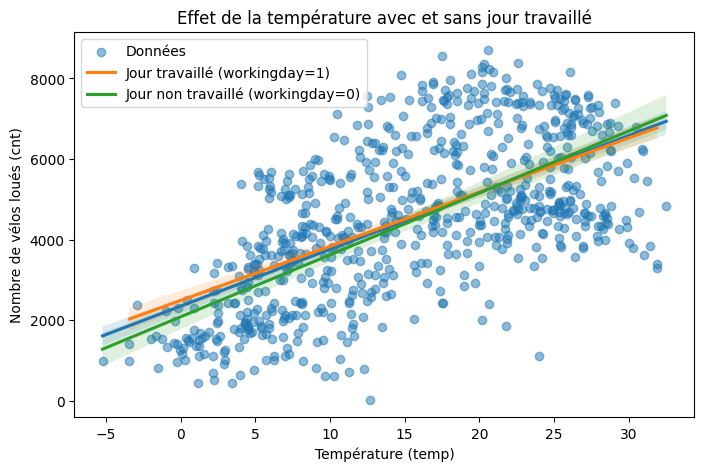

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# 📥 Charger les données
url = "https://raw.githubusercontent.com/christophM/interpretable-ml-book/refs/heads/master/data/bike.csv"
df = pd.read_csv(url)

# 🎯 Sélection des colonnes pertinentes
df = df[["workingday", "temp", "cnt"]]

# 🛠️ Encodage de la variable catégorielle "workingday"
df["workingday"] = df["workingday"].map({"NO WORKING DAY": 0, "WORKING DAY": 1})

# ➕ Création de la variable d'interaction temp x workingday
df["temp_workingday"] = df["temp"] * df["workingday"]

# 📊 Définition des variables indépendantes et cible
X = df[["temp", "workingday", "temp_workingday"]]
X = sm.add_constant(X)  # Ajout de l'intercept
y = df["cnt"]

# 📈 Ajustement du modèle de régression linéaire
model = sm.OLS(y, X).fit()

# 🔍 Affichage des résultats du modèle
print(model.summary())

# 📉 📊 Visualisation de l'effet de l'interaction
plt.figure(figsize=(8,5))
sns.regplot(x=df["temp"], y=df["cnt"], data=df, scatter_kws={"alpha": 0.5}, label="Données")

# Courbes séparées pour jours travaillés et non travaillés
sns.regplot(x=df[df["workingday"] == 1]["temp"],
            y=df[df["workingday"] == 1]["cnt"],
            scatter=False,
            label="Jour travaillé (workingday=1)")

sns.regplot(x=df[df["workingday"] == 0]["temp"],
            y=df[df["workingday"] == 0]["cnt"],
            scatter=False,
            label="Jour non travaillé (workingday=0)")

plt.xlabel("Température (temp)")
plt.ylabel("Nombre de vélos loués (cnt)")
plt.title("Effet de la température avec et sans jour travaillé")
plt.legend()
plt.show()


### 1.3.3 Effets Non Linéaires - GAMs 🚀

Le monde **n'est pas linéaire**. En régression linéaire, on suppose que **l'effet d'une variable est constant** sur toute son étendue.  

Exemple ❄️🔥 :  
- L'augmentation de **10°C à 11°C** **augmente** le nombre de vélos loués.  
- L'augmentation de **40°C à 41°C** **diminue** le nombre de vélos loués (trop chaud !).  
- 📉 **Le modèle linéaire ne capture pas ce phénomène !**  

---

#### 📊 **Trois solutions pour capturer les non-linéarités**  

1. ...
2. ...
3. ...

##### 3️⃣ **GAMs - Modèles Additifs Généralisés**  
- **On laisse le modèle apprendre la non-linéarité** grâce aux **splines**.  
- **Formule d’un GAM** :  
  $$
  g(E[Y | X]) = \beta_0 + f_1(x_1) + f_2(x_2) + \dots + f_p(x_p)
  $$  
  où chaque \( f_j(x_j) \) est une **fonction lisse ajustée automatiquement**.  

- ✅ GAM = **Meilleur compromis entre flexibilité et interprétabilité**.  


#### 📌 **Exemple : Effet Non Linéaire de la Température sur la Location de Vélos 🚲**  


In [ ]:
! pip install pygam

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 20.1 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1


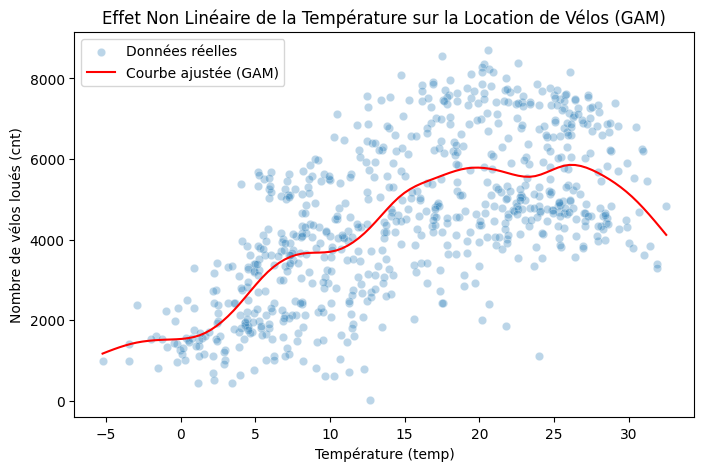

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from pygam import LinearGAM, s
import matplotlib.pyplot as plt
import seaborn as sns

# 📥 Charger les données bike rental
url = "https://raw.githubusercontent.com/christophM/interpretable-ml-book/refs/heads/master/data/bike.csv"
df = pd.read_csv(url)

# 🎯 Sélection des colonnes pertinentes
df = df[["temp", "cnt"]]

# 📊 Ajustement d'un GAM avec un spline sur temp
gam = LinearGAM(s(0)).fit(df[["temp"]], df["cnt"])

# 📉 Prédiction sur un range de température
temp_range = np.linspace(df["temp"].min(), df["temp"].max(), 100)
preds = gam.predict(temp_range)

# 📈 Visualisation
plt.figure(figsize=(8,5))
sns.scatterplot(x=df["temp"], y=df["cnt"], alpha=0.3, label="Données réelles")
plt.plot(temp_range, preds, color="red", label="Courbe ajustée (GAM)")
plt.xlabel("Température (temp)")
plt.ylabel("Nombre de vélos loués (cnt)")
plt.title("Effet Non Linéaire de la Température sur la Location de Vélos (GAM)")
plt.legend()
plt.show()


In [ ]:
! pip install pygam

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 21.6 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1


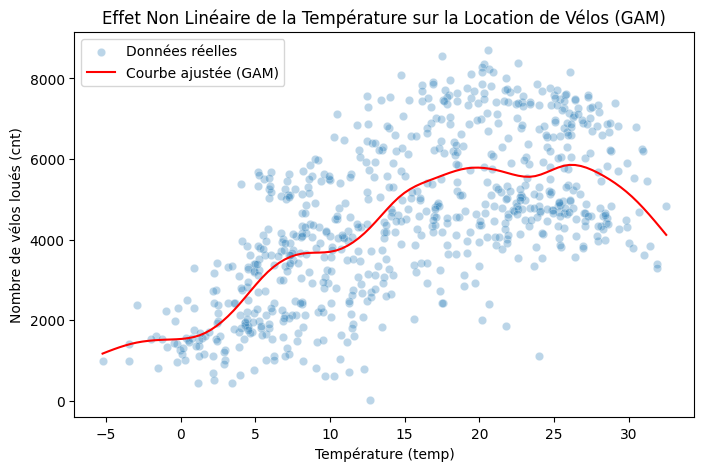

---

### 📌 **Résumé**  
- **GLM** = Régression linéaire généralisée avec une distribution adaptée (Poisson, Bernoulli...).
- **GAM** = Même principe mais avec **fonctions lisses** pour capturer la non-linéarité.
- **Bien choisir la distribution et la fonction de lien** pour éviter les incohérences.

Les GLM et GAM sont des outils puissants pour lever les hypothèses restrictives de la régression linéaire classique.


## 1.4 Decision Tree 🌳  

Les **modèles linéaires échouent** lorsque :  
📌 **Les relations sont non linéaires**  
📌 **Les variables interagissent entre elles**  

🔹 **Solution : Arbre de Décision !**  
- Découpe l’espace en **sous-groupes homogènes**.  
- Chaque **feuille** correspond à un **groupe final** avec une prédiction moyenne.  
- Utilisable pour **classification** et **régression**.  

### 📌 **1.4.1 Interprétation**  

### 📌 **1.4.1 Interprétation**  

- **Départ** : On commence **à la racine**.  
- **Décision** : On suit les **conditions** (SI \( x < c \) ALORS…).  
- **Prédiction** : Une fois dans une **feuille**, la valeur affichée est la **moyenne des valeurs d’entraînement**.  

🔹 **Exemple de règle**  
- **SI** température > 12°C ET jours depuis 2011 > 430  
- **ALORS** location moyenne ≈ 6600 vélos.  

🔹 **Exemple de règle**  
- **SI** température > 12°C ET jours depuis 2011 > 430  
- **ALORS** location moyenne ≈ 6600 vélos.  

---

### 📌 **Importance des variables**  

💡 **Mesure clé : réduction de l’impureté** : ...

🌳 **Plus un feature est utilisé pour les splits, plus il est important !**  

---



### 📌 **1.4.2 Exemple : Prédiction de location de vélos 🚲**  

📌 **Objectif** : Construire un arbre de décision pour prédire le nombre de vélos loués en fonction de la température et du temps.  


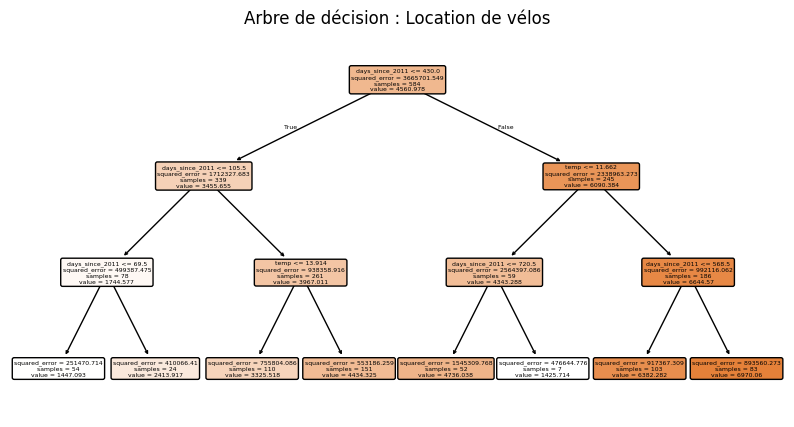


✅ **Erreur moyenne absolue (MAE) :** 666.6052322172947


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error


# 📥 Charger les données
url = "https://raw.githubusercontent.com/christophM/interpretable-ml-book/refs/heads/master/data/bike.csv"
df = pd.read_csv(url)

# 🎯 Sélection des colonnes pertinentes
features = ["temp", "days_since_2011"]
target = "cnt"
df = df[features + [target]]



# 🔍 Division train/test
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)


# 🌳 Ajuster un arbre de décision (profondeur max = 2)
tree = DecisionTreeRegressor(max_depth=3, random_state=42)
tree.fit(X_train, y_train)


# 📊 Visualisation de l'arbre
plt.figure(figsize=(10,5))
plot_tree(tree, feature_names=features, filled=True, rounded=True)
plt.title("Arbre de décision : Location de vélos")
plt.show()

# 📈 Prédiction et évaluation
y_pred = tree.predict(X_test)
print("\n✅ **Erreur moyenne absolue (MAE) :**", mean_absolute_error(y_test, y_pred))


## 1.5 Decision Rules 🏛️  

Les règles décisionnelles sont des **statements IF-THEN** du type :  
📌 **SI** une condition est satisfaite **ALORS** faire une prédiction.  

Exemple :  
- **SI** temp > 30°C et vent > 20 km/h  
- **ALORS** peu de vélos seront loués.  

Les **modèles basés sur des règles** sont les plus **interprétables** car ils ressemblent à la logique humaine.  
On distingue **deux grandes approches** :  
- **Listes de décisions** (ordered) : On prend la **première règle qui s'applique**.  
- **Ensembles de décisions** (unordered) : Plusieurs règles peuvent s'appliquer, et on agrège (ex: vote majoritaire).  

### 📌 **1.5.1 OneR : Règles basées sur une seule variable**  

🔹 **Principe** :  
1️⃣ On choisit ...

### 📌 **1.5.2 Sequential Covering : Règles complexes**  

🔹 **Principe** :  
✅ On apprend **une règle à la fois**, puis on **retire** les données couvertes.  
✅ On répète jusqu'à couvrir l'ensemble des cas.  

🔹 **Exemple : Prédiction de la location de vélos 🚲**  
**Règle apprise avec RIPPER** :  
- **SI** temp ≥ 16°C ET météo = "GOOD"  
- **ALORS** beaucoup de vélos loués.  

RIPPER construit **une liste ordonnée** de règles, assurant **une prédiction pour chaque cas**.

### 📌 **1.5.3 Bayesian Rule Lists (BRL) 🧠**  

🔹 **Idée principale** :  
📌 **On génère d'abord des conditions fréquentes**, puis **on apprend une liste de règles optimales** avec une approche bayésienne.  

🔹 **Exemple : Prédiction du cancer du col**  
- BRL apprend que les **MST et contraceptifs hormonaux** influencent le risque.  

| Condition | Probabilité de Cancer |
|-----------|----------------------|
| STDs = 1 | 16% |
| Contraceptif hormonal < 10 ans | 4.6% |
| Aucune condition remplie | 27.7% |

🔹 **Avantages des BRL** :  
✅ Liste **courte et interprétable**.  
✅ Gestion des incertitudes via une **approche bayésienne**.  

📌 **Résumé :**
- **OneR** : ...

## 1.7 Other Interpretable Models 📊  

🌱 **Les modèles interprétables** évoluent constamment.  
📌 Les classiques : **Régression linéaire, arbres de décision, Naïve Bayes**.  
📌 D'autres approches : **Modifications de modèles complexes pour les rendre interprétables**.  


### 1.7.1 Naïve Bayes 🤖  

📌 **Principe** :  
- Basé sur le **théorème de Bayes**.  
- Suppose une **indépendance conditionnelle** des variables :  
  $$
  P(C_k | x) = \frac{P(C_k) \prod_{i=1}^{n} P(x_i | C_k)}{Z}
  $$  
- **Interprétabilité** : Chaque variable apporte une contribution indépendante à la probabilité de classe.  
µ

### 1.7.2 K-Nearest Neighbors (KNN) 👥  

📌 **Principe** :  
- Prédit la classe/moyenne d'un point en fonction de ses **k plus proches voisins**.  
- ...

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# 📥 Charger les données cervicales
url = "https://raw.githubusercontent.com/christophM/interpretable-ml-book/refs/heads/master/data/cervical.csv"
df = pd.read_csv(url).dropna()
df["Biopsy"] = df["Biopsy"].map({"Healthy": 0, "Cancer": 1})

# 🎯 Sélection des features
X = df.drop(columns=["Biopsy"])
y = df["Biopsy"]

# 📊 Division train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🧠 Naïve Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

# 👥 K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# 📈 Résultats
print(f"✅ **Naïve Bayes Accuracy :** {accuracy_score(y_test, y_pred_nb):.2f}")
print(f"✅ **KNN Accuracy :** {accuracy_score(y_test, y_pred_knn):.2f}")


✅ **Naïve Bayes Accuracy :** 0.86
✅ **KNN Accuracy :** 0.94


# 2 Model-Agnostic Methods 🏛️  

🌱 **Pourquoi séparer interprétation et modèle ?**  
✅ **Flexibilité** : Fonctionne avec n'importe quel modèle (réseau de neurones, forêt aléatoire…).  
✅ **Comparabilité** : Même méthode d’interprétation pour tous les modèles.  
✅ **Indépendance** : On peut modifier le modèle sans changer l’explication.  



### 📌 **Le grand schéma de l’XAI**  

🔹 **1. Le Monde** 🌍  
- Le système réel que l'on veut comprendre (ex: marché immobilier, santé…).  

🔹 **2. Les Données** 📊  
- La représentation numérique du monde (ex: images, texte, tabulaire…).  

🔹 **3. Le Modèle Black Box** 🤖  
- Apprend à partir des données pour faire des prédictions.  

🔹 **4. Méthodes d’Interprétation** 🔍  
- Analyse les décisions du modèle pour expliquer les prédictions.  

🔹 **5. L’Humain** 🧑‍💻  
- Utilise les explications pour comprendre et agir.  


### 📌 **Interprétation Locale vs Globale**  

- **Globale** 🌎 : Analyse comment les features influencent le modèle en moyenne.  
- **Locale** 📍 : Explique **une seule** prédiction spécifique.  

📌 **Exemple**  
- **Globale** : "Le revenu et l’âge influencent fortement la fraude bancaire."  
- **Locale** : "Pourquoi cette transaction spécifique a été classée comme fraude ?"  

🚀 **Les méthodes agnostiques rendent l’interprétation universelle !**

In [ ]:
! pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=edf89a05ebce393d56589f018a7ec84330e95234407efe62467f7129cfc29d48
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


In [ ]:
import shap
import lime
import lime.lime_tabular
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# 📥 Charger les données cervicales
url = "https://raw.githubusercontent.com/christophM/interpretable-ml-book/refs/heads/master/data/cervical.csv"
df = pd.read_csv(url).dropna()
df["Biopsy"] = df["Biopsy"].map({"Healthy": 0, "Cancer": 1})

# 🎯 Sélection des features et cible
X = df.drop(columns=["Biopsy"])
y = df["Biopsy"]

# 🔍 Division train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🌳 Entraînement d’un modèle Black Box (Random Forest)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 🔍 Interprétation globale avec SHAP
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

shap_values
## 📊 Visualisation des importances des features
# shap.summary_plot(shap_values[1], X_test)

# 🔍 Interprétation locale avec LIME
explainer_lime = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X.columns, class_names=["Healthy", "Cancer"], discretize_continuous=True)
exp = explainer_lime.explain_instance(X_test.iloc[0].values, model.predict_proba)
exp.show_in_notebook()


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


## 7. Example-Based Explanations 🏛️  

🌱 **Pourquoi utiliser des exemples pour expliquer un modèle ?**  
✅ **Les humains raisonnent en analogies** (médecins, pompiers, data scientists…).  
✅ **Approche modèle-agnostique** : Fonctionne pour n'importe quel modèle.  
✅ **Utile lorsque les données ont du contexte** (images, textes, structures claires).  



### 📌 **Principales méthodes basées sur des exemples**  

📌 **1. Contre-exemples (Counterfactuals) 🔄**  
- Répond à : **"Que faut-il changer pour obtenir un résultat différent ?"**  
- Ex : "Si le salaire était +10%, le prêt serait accordé."  

📌 **2. Exemples adversariaux 🛑**  
- Contre-exemples **créés pour tromper** le modèle (attaques adversariales).  
- Ex : Modifier un pixel d’une image → le modèle confond un chien avec un chat.  

📌 **3. Prototypes & Critiques 🧐**  
- Prototypes = **exemples typiques** du dataset.  
- Critiques = **exemples atypiques**, mal représentés par les prototypes.  

📌 **4. Instances influentes 🔍**  
- Trouver **quels points de données ont influencé un modèle**.  
- Utile pour **déboguer le modèle** et identifier des erreurs de dataset.  

📌 **5. k-Nearest Neighbors (KNN) 👥**  
- Un modèle intrinsèquement explicable basé sur les **plus proches voisins**.  
- On peut expliquer une prédiction en listant **les k voisins les plus proches**.  

🚀 **Ces méthodes aident à comprendre et auditer les modèles !**

In [ ]:
!pip install dice-ml

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 58.8 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.3 which is incompatible.
cudf-cu12 24.12.0 requires pandas<2.2.4dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
plotnine 0.14.5 requires pandas>=2.2.0, but you have pandas 1.5.3 which is incompatible.
dask-cudf-cu12 24.12.0 requires pandas<2.2.4dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
mizani 0.13.1 requires pandas>=2.2.0, but you have pandas 1.5.3 which is incompatible.
dask-expr 1.1.19 requires pandas>=2, but you 

In [ ]:
import pandas as pd
import numpy as np
import shap
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from dice_ml import Dice, Data  # Import Data from dice_ml instead of dice_ml.data_interfaces

# 📥 Charger les données cervicales
url = "https://raw.githubusercontent.com/christophM/interpretable-ml-book/refs/heads/master/data/cervical.csv"
df = pd.read_csv(url).dropna()
df["Biopsy"] = df["Biopsy"].map({"Healthy": 0, "Cancer": 1})

# 🎯 Sélection des features et cible
X = df.drop(columns=["Biopsy"])
y = df["Biopsy"]

# 🔍 Division train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 👥 Modèle k-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# 🔍 Explication locale avec les 3 plus proches voisins
instance = X_test.iloc[0].values.reshape(1, -1)
neighbors = knn.kneighbors(instance, n_neighbors=3, return_distance=False)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [ ]:

print("\n📌 **Instance testée :**")
print(X_test.iloc[0])


📌 **Instance testée :**
Age                                 16.0
Number.of.sexual.partners            1.0
First.sexual.intercourse            16.0
Num.of.pregnancies                   1.0
Smokes                               0.0
Smokes..years.                       0.0
Hormonal.Contraceptives              0.0
Hormonal.Contraceptives..years.      0.0
IUD                                  0.0
IUD..years.                          0.0
STDs                                 0.0
STDs..number.                        0.0
STDs..Number.of.diagnosis            0.0
STDs..Time.since.first.diagnosis     1.0
STDs..Time.since.last.diagnosis      1.0
Name: 713, dtype: float64


In [ ]:
y_test.iloc[0]

0


👥 **3 plus proches voisins :**
     Age  Number.of.sexual.partners  First.sexual.intercourse  \
451   16                          1                        16   
437   16                          1                        15   
745   16                          1                        15   

     Num.of.pregnancies  Smokes  Smokes..years.  Hormonal.Contraceptives  \
451                   1       0             0.0                        0   
437                   1       0             0.0                        0   
745                   1       0             0.0                        0   

     Hormonal.Contraceptives..years.  IUD  IUD..years.  STDs  STDs..number.  \
451                              0.0    0          0.0     0              0   
437                              0.0    0          0.0     0              0   
745                              0.0    0          0.0     0              0   

     STDs..Number.of.diagnosis  STDs..Time.since.first.diagnosis  \
451              

# 3 Global Model-Agnostic Methods 🌎  

🌱 **Pourquoi analyser un modèle dans sa globalité ?**  
✅ Comprendre **les tendances générales** et le comportement moyen du modèle.  
✅ Debugger et identifier des biais structurels.  
✅ Comparer plusieurs modèles sur les mêmes critères.  

---

 📌 **Principales méthodes globales d'interprétation**  

📌 **1. Partial Dependence Plot (PDP) 📈**  
- **Effet moyen** d’une variable sur la prédiction.  
- Fonctionne bien si les variables sont **indépendantes**.  

📌 **2. Accumulated Local Effect (ALE) 🔄**  
- Version améliorée du PDP qui fonctionne avec des variables **corrélées**.  

📌 **3. Interaction des Features (H-statistic) ⚡**  
- Quantifie **l'importance des interactions** entre les variables.  

📌 **4. Décomposition Fonctionnelle 🏗️**  
- Divise la fonction de prédiction en **composants plus simples**.  

📌 **5. Permutation Feature Importance 🔀**  
- Mesure **l'importance d'une variable** en la perturbant aléatoirement.  

📌 **6. Global Surrogate Models 🧩**  
- Remplace un modèle complexe par un modèle plus simple pour l'explication.  

📌 **7. Prototypes & Critiques 🧐**  
- Sélectionne des **exemples typiques** et **atypiques** du dataset.  

🚀 **Ces méthodes aident à mieux comprendre et auditer les modèles ML !**


## 3.1 Partial Dependence Plot (PDP) 📈  

🌱 **Pourquoi utiliser les PDPs ?**  
✅ Montre **l'effet moyen** d'une ou deux variables sur la prédiction d’un modèle.  
✅ Aide à comprendre si une relation est **linéaire, monotone ou complexe**.  
✅ Indique **comment le modèle généralise** les relations entre les variables et la cible.  


### 📌 **Comment ça marche ?**  

🔹 **Définition mathématique**  
- PDP moyenne l'effet d'une variable en marginalisant les autres :  
  $$ \hat{f}_S(x_S) = \mathbb{E}_{X_C} [\hat{f}(x_S, X_C)] $$  
- Cette espérance est estimée par **moyenne empirique** (Monte Carlo) :  
  $$ \hat{f}_S(x_S) = \frac{1}{n} \sum_{i=1}^{n} \hat{f}(x_S, x_C^{(i)}) $$  

🔹 **Interprétation**  
- **Si le PDP est plat**, la variable n'a **pas d'effet direct** sur la prédiction.  
- **Si le PDP varie**, cela signifie que la variable impacte la prédiction.  

🔹 **Cas des variables catégoriques**  
- Pour chaque catégorie, on **force toutes les instances** à prendre cette valeur.  
- On moyenne ensuite les prédictions.


### 📌 **Exemples d'utilisation des PDPs**  

📌 **1. Analyse du modèle de prédiction de vélos 🚲**  
- PDPs des variables : **température, humidité, vent**.  
- **La location de vélos** suit une courbe en U inversé selon la température.  
- **L’humidité élevée** et le **vent fort** réduisent la demande de vélos.  

📌 **2. Analyse du modèle de prédiction du cancer du col de l’utérus 🏥**  
- PDPs des variables : **âge, contraceptifs hormonaux, nombre de grossesses**.  
- **Risque augmente après 40 ans** et après **10 ans de contraceptifs**.  
- **Interaction âge x grossesses** : certaines valeurs semblent réduire le risque.  

🚀 **Les PDPs permettent une interprétation globale des modèles !**

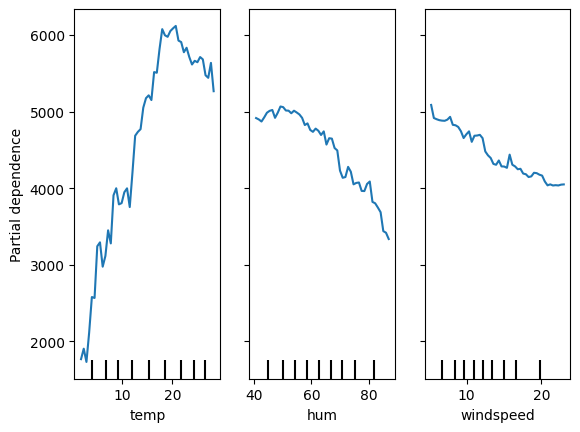

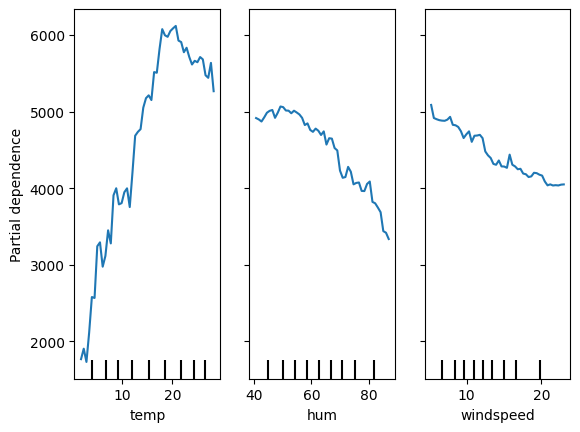

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.inspection import partial_dependence
# Instead of plot_partial_dependence, use PartialDependenceDisplay
from sklearn.inspection import PartialDependenceDisplay
from sklearn.model_selection import train_test_split

# 📥 Charger les données sur la location de vélos 🚲
bike_url = "https://raw.githubusercontent.com/christophM/interpretable-ml-book/refs/heads/master/data/bike.csv"
bike_df = pd.read_csv(bike_url)

# 📥 Charger les données sur le cancer du col de l'utérus 🏥
cancer_url = "https://raw.githubusercontent.com/christophM/interpretable-ml-book/refs/heads/master/data/cervical.csv"
cancer_df = pd.read_csv(cancer_url).dropna()
cancer_df["Biopsy"] = cancer_df["Biopsy"].map({"Healthy": 0, "Cancer": 1})

# 🔍 Sélection des variables pertinentes
bike_features = ["temp", "hum", "windspeed"]
cancer_features = ["Age", "Hormonal.Contraceptives..years.", "Num.of.pregnancies"]

# 📊 PDP pour la location de vélos 🚲
X_bike = bike_df[bike_features]
y_bike = bike_df["cnt"]
bike_model = RandomForestRegressor(n_estimators=100, random_state=42)
bike_model.fit(X_bike, y_bike)

# Use PartialDependenceDisplay.from_estimator instead of plot_partial_dependence
display = PartialDependenceDisplay.from_estimator(bike_model, X_bike, features=[0, 1, 2], feature_names=bike_features, grid_resolution=50)
display.plot();
plt.show();

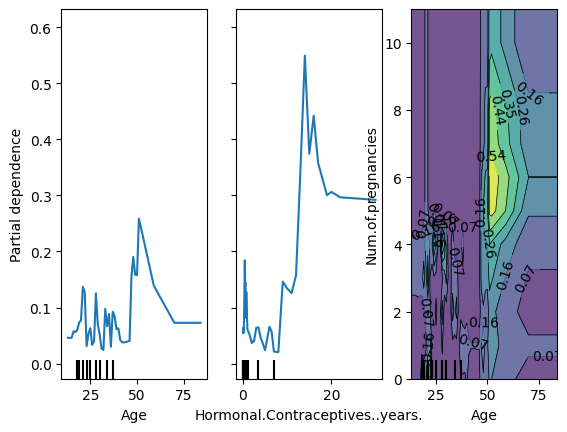

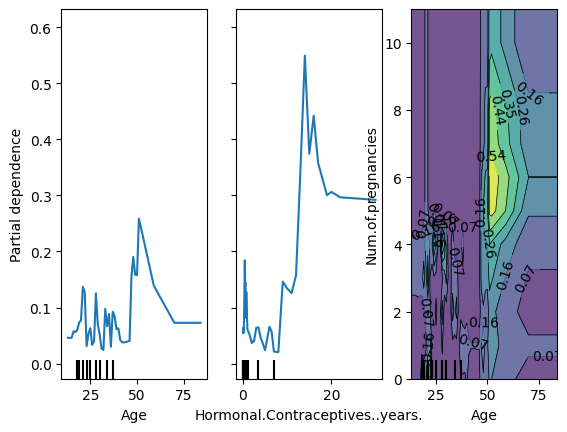

In [ ]:
# 📊 PDP pour la prédiction du cancer du col 🏥
X_cancer = cancer_df[cancer_features]
y_cancer = cancer_df["Biopsy"]
cancer_model = RandomForestClassifier(n_estimators=100, random_state=42)
cancer_model.fit(X_cancer, y_cancer)

# Use PartialDependenceDisplay.from_estimator instead of plot_partial_dependence
display = PartialDependenceDisplay.from_estimator(cancer_model, X_cancer, features=[0, 1, (0, 2)], feature_names=cancer_features, grid_resolution=50)
display.plot();
plt.show();

1️⃣ Premier graphe (à gauche) : PDP pour l’âge (Age)

    Ce graphe montre l'impact moyen de l'âge sur la prédiction du modèle.
    On observe une augmentation du risque après environ 40 ans, indiquant une corrélation entre l'âge et la probabilité de cancer.
    Avant 40 ans, la dépendance partielle reste proche de zéro, ce qui signifie que le modèle prédit un faible risque pour les jeunes patientes.

2️⃣ Deuxième graphe (au centre) : PDP pour la durée des contraceptifs hormonaux (Hormonal.Contraceptives..years.)

    L'effet de cette variable n'est pas linéaire.
    Le risque reste faible pour une durée inférieure à 10 ans, puis augmente fortement après 10 ans, ce qui pourrait suggérer une corrélation entre une utilisation prolongée et un risque plus élevé.

3️⃣ Troisième graphe (à droite) : PDP en 2D pour l'interaction entre l'âge (Age) et le nombre de grossesses (Num.of.pregnancies)

    La couleur représente la probabilité de prédiction du cancer.
    Zone jaune/verte (probabilité élevée) autour de 45-50 ans avec 2 à 4 grossesses → Le modèle estime que ces patientes ont un risque plus élevé.
    Zone violette (probabilité faible) pour les femmes plus jeunes et/ou avec moins de grossesses → Faible risque estimé.
    Il semble que l’âge soit un facteur dominant, avec une augmentation du risque vers 45 ans et plus, indépendamment du nombre de grossesses.

## 📌 3.2 Accumulated Local Effects (ALE) Plot


### 🔍 Introduction

Les **Accumulated Local Effects (ALE) plots** permettent d’expliquer comment les variables influencent les prédictions d’un modèle de machine learning en moyenne, **sans introduire de biais dû aux corrélations entre variables**. Ils offrent une **alternative robuste aux PDP (Partial Dependence Plots)**, qui supposent l’indépendance des variables et peuvent générer des valeurs irréalistes lorsqu’il existe des dépendances entre les caractéristiques.

L'ALE est particulièrement utile pour :
- Corriger les biais des PDP dus aux **corrélations entre variables**.
- Isoler **l’effet d’une variable** en bloquant l’effet des autres.
- Fournir une **interprétation plus fidèle** des modèles complexes.

### 🧠 **Motivation et intuition**

L'ALE repose sur un **raisonnement local** et accumule les variations de prédictions pour estimer l'effet d'une variable $x_j$.  

**Problème des PDPs avec des variables corrélées :**  
Si une variable $x_1$ est corrélée avec $x_2$, remplacer $x_1$ par différentes valeurs dans un PDP peut créer des **valeurs impossibles ou peu probables** dans les données.  
Exemple : si **surface habitable** et **nombre de pièces** sont fortement corrélés, fixer une surface très grande pour une maison avec peu de pièces est peu réaliste.

**Solution ALE :**  
- On divise la variable $x_j$ en intervalles.
- Dans chaque intervalle, on mesure l’effet local de $x_j$ en **calculant la différence de prédiction entre une valeur légèrement augmentée et une valeur légèrement diminuée**.
- On **accumule ces différences** pour obtenir l'effet total de $x_j$ sur la prédiction.

### 🧮 **Formulation mathématique**

L'effet ALE d'une variable $x_j$ est défini comme :

$$
\hat{f}_{j,ALE}(x) = \int_{z_0}^{x} E_{X_C | X_j = z} \left[ \frac{\partial \hat{f}(X_j, X_C)}{\partial X_j} \Bigg| X_j = z \right] dz - \text{constant}
$$

où :
- $\hat{f}$ est le modèle de prédiction.
- $X_C$ représente toutes les autres variables du modèle (sauf $X_j$).
- $\partial \hat{f} / \partial X_j$ est la **variation locale** de la prédiction lorsque $X_j$ change légèrement.

ALE fonctionne en **approximant la dérivée** par des différences finies :

$$
\hat{f}_{j,ALE}(x) = \sum_k \frac{1}{n_k} \sum_{i : x_i \in N_k} \left[ \hat{f}(z_k, x_{-j}^{(i)}) - \hat{f}(z_{k-1}, x_{-j}^{(i)}) \right]
$$

où :
- $z_k$ et $z_{k-1}$ sont les bornes d’un intervalle de la variable $X_j$.
- $N_k$ est l’ensemble des instances dont $X_j$ est dans l’intervalle $k$.
- $n_k$ est le nombre d’instances dans cet intervalle.

Enfin, pour **centrer l'effet ALE autour de zéro**, on soustrait la moyenne des effets calculés :

$$
\hat{f}_{j,ALE}(x) = \hat{f}_{j,ALE}(x) - \frac{1}{n} \sum_{i=1}^{n} \hat{f}_{j,ALE}(x_j^{(i)})
$$

---

### 📊 **Différences entre PDP, M-Plots et ALE**
| Méthode  | Calcul | Prend en compte la corrélation ? | Risque de valeurs irréalistes ? | Type d'effet estimé |
|----------|--------|---------------------------------|----------------------------------|----------------------|
| **PDP**  | Moyenne des prédictions pour une valeur donnée de $X_j$ | ❌ Non | ✅ Oui | Effet total (peut être biaisé par les autres variables) |
| **M-Plot** | Moyenne conditionnelle des prédictions | ✅ Oui | ❌ Non | Effet mixte (inclut effets des variables corrélées) |
| **ALE** | Accumulation des différences locales de prédictions | ✅ Oui | ❌ Non | Effet pur de la variable $X_j$ |

### 🔢 **ALE pour les variables catégoriques et interactions**
#### **ALE pour une variable catégorique**
- Les **catégories n’ont pas d’ordre naturel**, ce qui complique l’accumulation des effets.
- Une solution consiste à **ordonner les catégories** en fonction de leur **similarité** avec les autres variables.
- On calcule la distance entre les distributions conditionnelles des catégories, et on ordonne celles qui se ressemblent le plus.

#### **ALE pour interactions entre deux variables**
- Pour analyser **l’interaction de deux variables**, on calcule l’effet ALE en **2D** en plaçant une grille sur les deux variables.
- On effectue la **différence des prédictions aux coins des cellules de la grille** pour capturer l’interaction supplémentaire entre les deux variables.

Formule pour l’interaction de $X_1$ et $X_2$ :

$$
\hat{f}_{1,2,ALE}(x_1, x_2) = \sum_k \sum_l \frac{1}{n_{k,l}} \sum_{i : (x_1^{(i)}, x_2^{(i)}) \in N_{k,l}} \left[ (\hat{f}(z_k, z_l, x_{-1,2}^{(i)}) - \hat{f}(z_k, z_{l-1}, x_{-1,2}^{(i)})) - (\hat{f}(z_{k-1}, z_l, x_{-1,2}^{(i)}) - \hat{f}(z_{k-1}, z_{l-1}, x_{-1,2}^{(i)})) \right]
$$

où :
- $(z_k, z_l)$ et $(z_{k-1}, z_{l-1})$ sont les coins des cellules de la grille.
- $N_{k,l}$ est l’ensemble des instances dont $(X_1, X_2)$ est dans la cellule $(k,l)$.
- $n_{k,l}$ est le nombre d’instances dans cette cellule.



---

### 🎯 **Résumé**
- **ALE plots sont une alternative robuste aux PDPs** qui corrige les biais dus aux corrélations.
- **Ils utilisent des différences locales plutôt que des moyennes brutes**, permettant d'isoler l'effet pur d'une variable.
- **Ils sont rapides à calculer et évitent les valeurs irréalistes** dans les données.
- **Les interactions de deux variables peuvent aussi être analysées avec ALE en 2D**.

🚀 **Conclusion :** ALE est une méthode avancée et fiable pour analyser les effets des variables dans un modèle complexe, notamment lorsqu'il existe des corrélations entre les caractéristiques. 🔍



In [ ]:
! pip install alibi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.1/522.1 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 50.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 33.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 7.2 MB/s eta 0:00:00
  Attempting uninstall: Pillow
    Found existing installation: pillow 11.1.0
    Uninstalling pillow-11.1.0:
      Successfully uninstalled pillow-11.1.0
  Attempting uninstall: attrs
    Found existing installation: attrs 25.1.0
    Uninstalling attrs-25.1.0:
      Successfully uninstalled attrs-25.1.0
  Attempting uninstall: scikit-image
    Found existing installation: scikit-image 0.25.2
    Uninstalling scikit-image-0.25.2:
      Successfully uninstalled scikit-image-0.25.2


In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from alibi.explainers import ALE, plot_ale

In [ ]:
data = fetch_california_housing(as_frame=True)
feature_names = data.feature_names



In [ ]:
X, y = data.data.to_numpy(), data.target.to_numpy()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
lr = LinearRegression()

In [ ]:
rf = RandomForestRegressor()

In [ ]:
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
mean_squared_error(y_test, lr.predict(X_test))

0.5411287478470682

In [ ]:
rf = RandomForestRegressor()

In [ ]:
rf.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
mean_squared_error(y_test, rf.predict(X_test))

0.25847655900746097

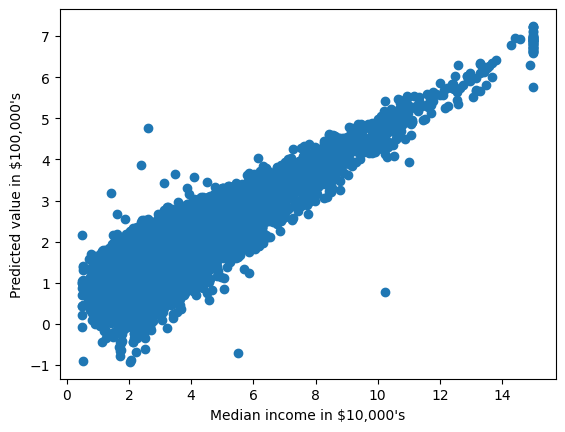

In [ ]:
FEATURE = 'MedInc'
index = feature_names.index(FEATURE)

fig, ax = plt.subplots()
ax.scatter(X_train[:, index], lr.predict(X_train));

ax.set_xlabel('Median income in $10,000\'s');
ax.set_ylabel('Predicted value in $100,000\'s');

In [ ]:
lr_ale = ALE(lr.predict, feature_names=feature_names, target_names=['Value in $100,000\'s'])
rf_ale = ALE(rf.predict, feature_names=feature_names, target_names=['Value in $100,000\'s'])

In [ ]:
lr_exp = lr_ale.explain(X_train)
rf_exp = rf_ale.explain(X_train)

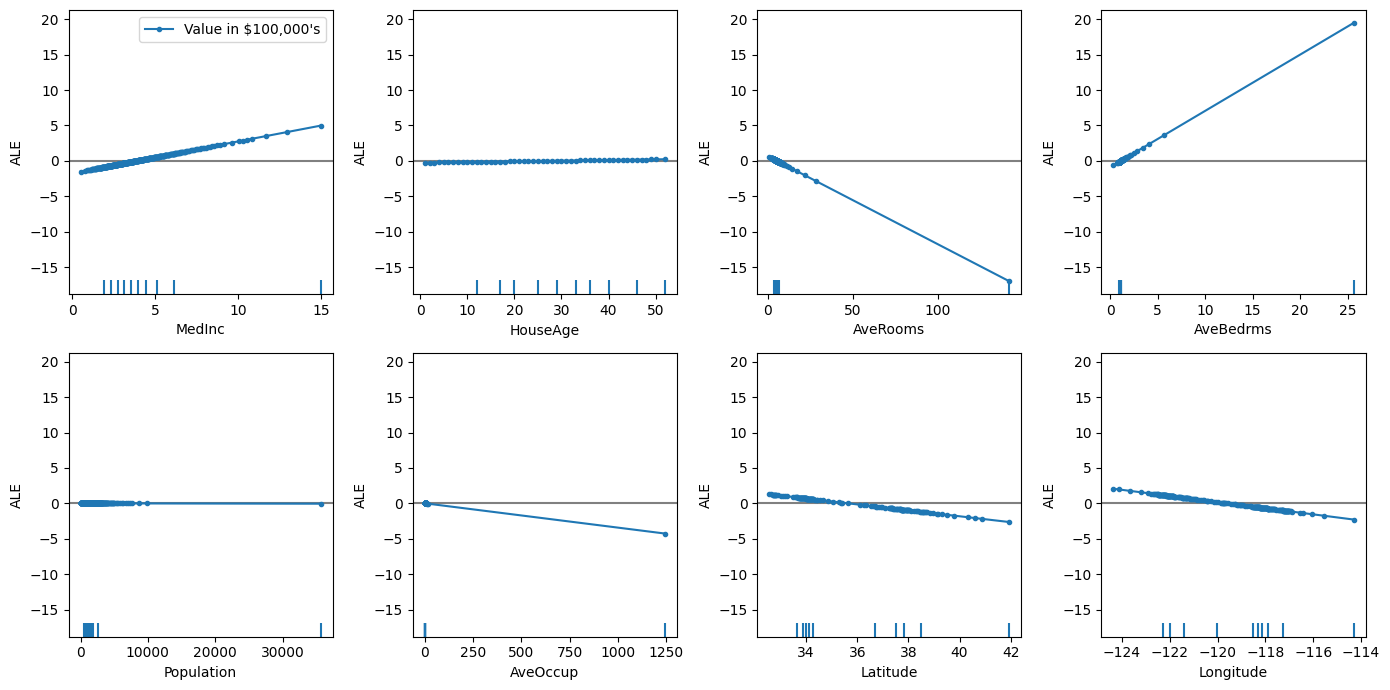

In [ ]:
plot_ale(lr_exp, n_cols=4, fig_kw={'figwidth':14, 'figheight': 7});

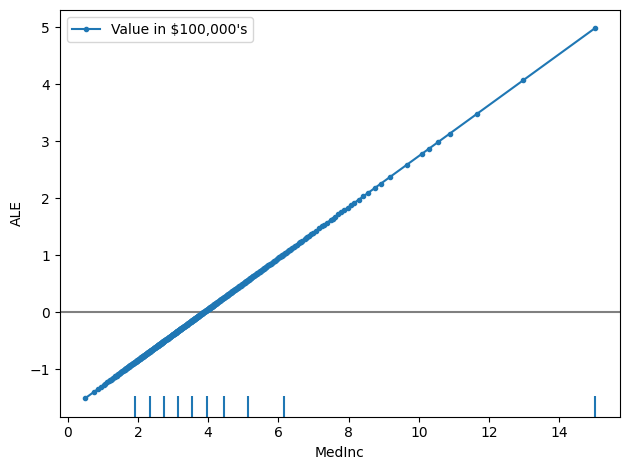

In [ ]:
plot_ale(lr_exp, features=['MedInc']);

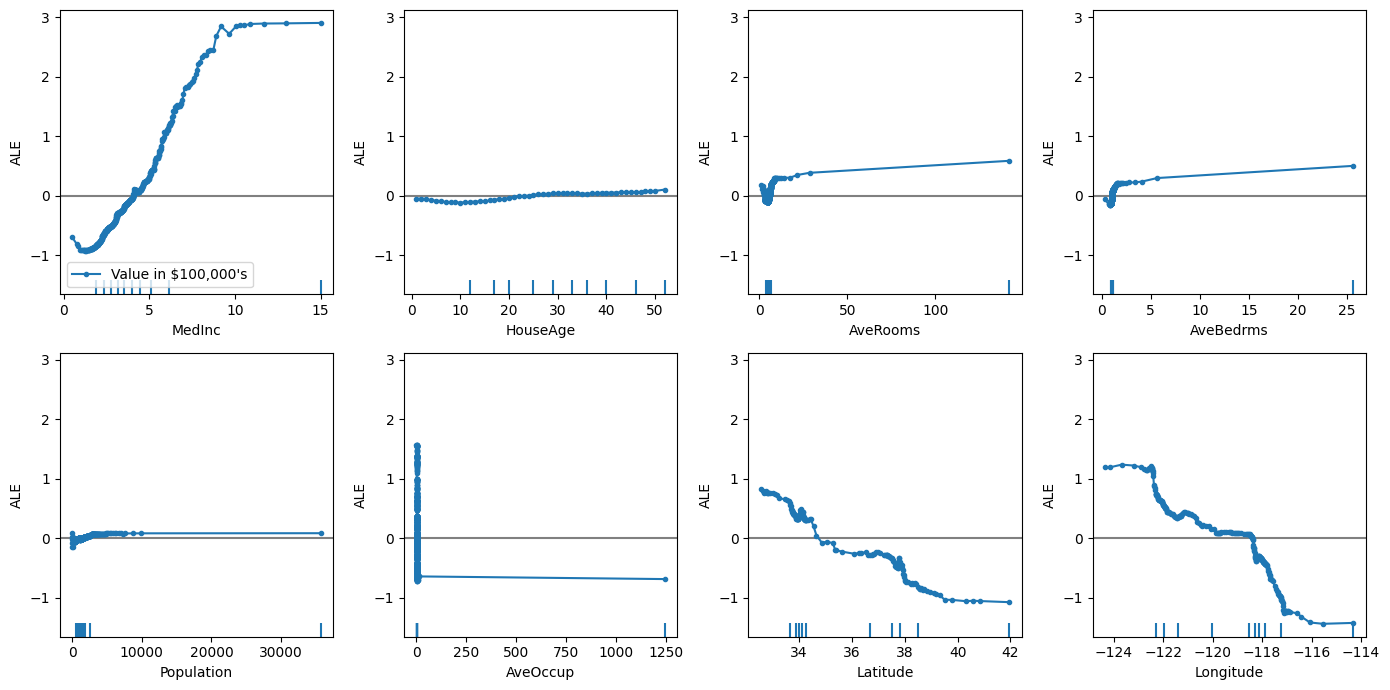

In [ ]:
plot_ale(rf_exp, n_cols=4, fig_kw={'figwidth':14, 'figheight': 7});